In [6]:
import os
import json
import torch
from approximate_max_hv_run import get_max_hv, construct_mvar_hv, exp_dir, max_hv_dir
from botorch.utils.multi_objective import is_non_dominated
from time import time
from get_hv_from_mvars import get_hv_from_mvars

def save_all_X(problem, output_name):
    all_Xs = []
    problem_path = os.path.join(exp_dir, problem)
    for p in os.listdir(problem_path):
        p_path = os.path.join(problem_path, p)
        if os.path.isdir(p_path):
            for fp in os.listdir(p_path):
                fp_path = os.path.join(p_path, fp)
                try:
                    output = torch.load(fp_path)
                    all_Xs.append(output["X"])
                except:
                    continue
    all_Xs = torch.cat(all_Xs).unique(dim=0)
    print(all_Xs.shape)
    output_path = os.path.join(max_hv_dir, f"{output_name}.pt")
    if os.path.exists(output_path):
        raise FileExistsError
    torch.save({"all_Xs": all_Xs}, output_path)


def merge_mvars(problem, output_name):
    start = time()
    output_path = os.path.join(max_hv_dir, f"{output_name}.pt")
    if os.path.exists(output_path):
        raise FileExistsError
    all_mvars = []
    for p in os.listdir(max_hv_dir):
        if f"{problem}_mvar" not in p:
            continue
        p_path = os.path.join(max_hv_dir, p)
        if "_nd.pt" in p_path:
            # These are non-dominated
            mvars = torch.load(p_path)
            all_mvars.append(mvars)
            print(f"Reading {p}, found {mvars.shape}. Time {time()-start}.")
        else:
            # remove the non-dominated entries
            mvars = torch.load(p_path)
            print(f"Reading {p}, found {mvars.shape}. Time {time()-start}.")
            mask = is_non_dominated(mvars)
            print(f"Number of dominated points: {(~mask).sum()}")
            all_mvars.append(mvars[mask])
            # replace the file
            torch.save(mvars[mask], f"{p_path[:-3]}_nd.pt")
            os.remove(p_path)

    all_mvars = torch.cat(all_mvars, dim=0)
    mask = is_non_dominated(all_mvars)
    all_mvars = all_mvars[mask]
    print(f"MVaRs found: {all_mvars.shape}.")
    torch.save(all_mvars, output_path)


In [ ]:
save_all_X("penicillin", "penicillin_Xs")

In [ ]:
save_all_X("gmm3", "gmm3_Xs")

In [ ]:
save_all_X("disc_brake", "disc_brake_Xs")

In [ ]:
save_all_X("bc_v2", "bc_v2_Xs")

In [2]:
get_hv_from_mvars("penicillin")


KeyboardInterrupt



In [10]:
merge_mvars("disc_brake", "disc_brake_all_mvars")

FileExistsError: 

In [12]:
merge_mvars("bc_v2", "bc_all_mvars")

FileExistsError: 

In [9]:
merge_mvars("bc_heteroskedastic_v2", "bc_heteroskedastic_v2_all_mvars")
merge_mvars("gmm_corr", "gmm_corr_all_mvars")
merge_mvars("gmm_mul", "gmm_mul_all_mvars")

Reading bc_heteroskedastic_v2_mvar_10_nd.pt, found torch.Size([1268, 2]). Time 0.016989946365356445.
Reading bc_heteroskedastic_v2_mvar_9_nd.pt, found torch.Size([1309, 2]). Time 0.017877817153930664.
Reading bc_heteroskedastic_v2_mvar_12_nd.pt, found torch.Size([1248, 2]). Time 0.018306732177734375.
Reading bc_heteroskedastic_v2_mvar_16_nd.pt, found torch.Size([956, 2]). Time 0.01866769790649414.
Reading bc_heteroskedastic_v2_mvar_14_nd.pt, found torch.Size([1492, 2]). Time 0.01902484893798828.
Reading bc_heteroskedastic_v2_mvar_13_nd.pt, found torch.Size([1376, 2]). Time 0.019310712814331055.
Reading bc_heteroskedastic_v2_mvar_8_nd.pt, found torch.Size([1264, 2]). Time 0.019661664962768555.
Reading bc_heteroskedastic_v2_mvar_11_nd.pt, found torch.Size([1207, 2]). Time 0.019940853118896484.
Reading bc_heteroskedastic_v2_mvar_15_nd.pt, found torch.Size([1268, 2]). Time 0.02020883560180664.
Reading bc_heteroskedastic_v2_mvar_17_nd.pt, found torch.Size([562, 2]). Time 0.02049064636230468

In [13]:
get_hv_from_mvars("bc_heteroskedastic_v2")
get_hv_from_mvars("gmm_corr")
get_hv_from_mvars("gmm_mul")

FileExistsError: 

In [14]:
get_hv_from_mvars("gmm_mul")

FileExistsError: 

In [5]:
save_all_X("gmm3_07", "gmm3_07_Xs")

torch.Size([17880, 2])


FileExistsError: 

In [6]:
save_all_X("gmm3_08", "gmm3_08_Xs")

torch.Size([17893, 2])


FileExistsError: 

In [7]:
merge_mvars("gmm3_07", "gmm3_07_all_mvars")

Reading gmm3_07_mvar_0_nd.pt, found torch.Size([997, 3]). Time 0.022750139236450195.
Reading gmm3_07_mvar_10_nd.pt, found torch.Size([12688, 3]). Time 0.024882078170776367.
Reading gmm3_07_mvar_12_nd.pt, found torch.Size([2988, 3]). Time 0.02608799934387207.
Reading gmm3_07_mvar_2_nd.pt, found torch.Size([6583, 3]). Time 0.02745985984802246.
Reading gmm3_07_mvar_6_nd.pt, found torch.Size([611, 3]). Time 0.02832198143005371.
Reading gmm3_07_mvar_16_nd.pt, found torch.Size([5275, 3]). Time 0.030073881149291992.
Reading gmm3_07_mvar_14_nd.pt, found torch.Size([2907, 3]). Time 0.03130793571472168.
Reading gmm3_07_mvar_4_nd.pt, found torch.Size([4885, 3]). Time 0.03219008445739746.
Reading gmm3_07_mvar_13_nd.pt, found torch.Size([988, 3]). Time 0.032933950424194336.
Reading gmm3_07_mvar_3_nd.pt, found torch.Size([7349, 3]). Time 0.034967899322509766.
Reading gmm3_07_mvar_1_nd.pt, found torch.Size([4379, 3]). Time 0.03667116165161133.
Reading gmm3_07_mvar_11_nd.pt, found torch.Size([7207, 3]

In [8]:
merge_mvars("gmm3_08", "gmm3_08_all_mvars")

Reading gmm3_08_mvar_9_nd.pt, found torch.Size([7530, 3]). Time 0.005448818206787109.
Reading gmm3_08_mvar_8_nd.pt, found torch.Size([3375, 3]). Time 0.0068819522857666016.
Reading gmm3_08_mvar_2_nd.pt, found torch.Size([4166, 3]). Time 0.00781702995300293.
Reading gmm3_08_mvar_12_nd.pt, found torch.Size([3118, 3]). Time 0.008753061294555664.
Reading gmm3_08_mvar_10_nd.pt, found torch.Size([9930, 3]). Time 0.009877920150756836.
Reading gmm3_08_mvar_0_nd.pt, found torch.Size([716, 3]). Time 0.01052403450012207.
Reading gmm3_08_mvar_4_nd.pt, found torch.Size([4316, 3]). Time 0.011261940002441406.
Reading gmm3_08_mvar_14_nd.pt, found torch.Size([2253, 3]). Time 0.01194906234741211.
Reading gmm3_08_mvar_16_nd.pt, found torch.Size([4295, 3]). Time 0.012696981430053711.
Reading gmm3_08_mvar_6_nd.pt, found torch.Size([914, 3]). Time 0.013309955596923828.
Reading gmm3_08_mvar_11_nd.pt, found torch.Size([7737, 3]). Time 0.014158964157104492.
Reading gmm3_08_mvar_1_nd.pt, found torch.Size([2536,

In [4]:
get_hv_from_mvars("gmm3_07")

FileExistsError: 

In [5]:
get_hv_from_mvars("gmm3_08")

FileExistsError: 

In [7]:
save_all_X("gmm_4obj_08", "gmm_4obj_08_Xs")
save_all_X("gmm_4obj", "gmm_4obj_Xs")

torch.Size([17869, 2])
torch.Size([18842, 2])


In [8]:
merge_mvars("gmm_4obj", "gmm_4obj_all_mvars")

Reading gmm_4obj_mvar_9_nd.pt, found torch.Size([430, 4]). Time 0.03257918357849121.
Reading gmm_4obj_mvar_18_nd.pt, found torch.Size([208, 4]). Time 0.03503584861755371.
Reading gmm_4obj_mvar_8_nd.pt, found torch.Size([520, 4]). Time 0.035962820053100586.
Reading gmm_4obj_mvar_17_nd.pt, found torch.Size([3623, 4]). Time 0.03745388984680176.
Reading gmm_4obj_mvar_2_nd.pt, found torch.Size([7256, 4]). Time 0.03932499885559082.
Reading gmm_4obj_mvar_0_nd.pt, found torch.Size([655, 4]). Time 0.04023408889770508.
Reading gmm_4obj_mvar_15_nd.pt, found torch.Size([3124, 4]). Time 0.04094195365905762.
Reading gmm_4obj_mvar_11_nd.pt, found torch.Size([16452, 4]). Time 0.04370689392089844.
Reading gmm_4obj_mvar_4_nd.pt, found torch.Size([7891, 4]). Time 0.04532885551452637.
Reading gmm_4obj_mvar_6_nd.pt, found torch.Size([3122, 4]). Time 0.046449899673461914.
Reading gmm_4obj_mvar_13_nd.pt, found torch.Size([2062, 4]). Time 0.048036813735961914.
Reading gmm_4obj_mvar_1_nd.pt, found torch.Size([

In [9]:
merge_mvars("gmm_4obj_08", "gmm_4obj_08_all_mvars")

Reading gmm_4obj_08_mvar_11_nd.pt, found torch.Size([42722, 4]). Time 0.002610921859741211.
Reading gmm_4obj_08_mvar_6_nd.pt, found torch.Size([1583, 4]). Time 0.0038068294525146484.
Reading gmm_4obj_08_mvar_4_nd.pt, found torch.Size([22083, 4]). Time 0.004782676696777344.
Reading gmm_4obj_08_mvar_13_nd.pt, found torch.Size([4031, 4]). Time 0.005365848541259766.
Reading gmm_4obj_08_mvar_0_nd.pt, found torch.Size([1623, 4]). Time 0.0061528682708740234.
Reading gmm_4obj_08_mvar_17_nd.pt, found torch.Size([513, 4]). Time 0.006566762924194336.
Reading gmm_4obj_08_mvar_15_nd.pt, found torch.Size([18942, 4]). Time 0.00739598274230957.
Reading gmm_4obj_08_mvar_2_nd.pt, found torch.Size([19829, 4]). Time 0.009721755981445312.
Reading gmm_4obj_08_mvar_12_nd.pt, found torch.Size([4026, 4]). Time 0.010734796524047852.
Reading gmm_4obj_08_mvar_5_nd.pt, found torch.Size([5883, 4]). Time 0.012180805206298828.
Reading gmm_4obj_08_mvar_7_nd.pt, found torch.Size([235, 4]). Time 0.012455940246582031.
Re

In [10]:
get_hv_from_mvars("gmm_4obj")

MVaRs found: torch.Size([19341, 4]).


In [11]:
get_hv_from_mvars("gmm_4obj_08")

MVaRs found: torch.Size([44566, 4]).


## Plot the MVaR PF for disc brake

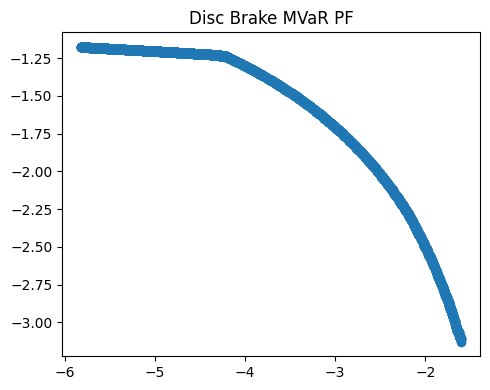

In [19]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib

rc('font', family='serif', style='normal', variant='normal', weight='normal', stretch='normal', size=8)
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
matplotlib.rcParams['axes.titlesize'] = 10
matplotlib.style.use('default')

fig, ax = plt.subplots(1, figsize=(5, 4))
all_mvars = torch.load(os.path.join(max_hv_dir, "disc_brake_all_mvars.pt"))
ax.scatter(all_mvars[:, 0], all_mvars[:, 1])
ax.set_title("Disc Brake MVaR PF")
fig.tight_layout()


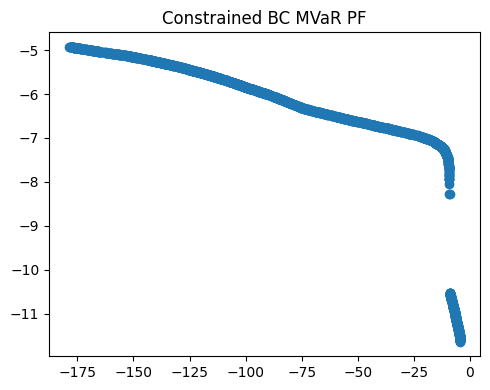

In [20]:
fig, ax = plt.subplots(1, figsize=(5, 4))
all_mvars = torch.load(os.path.join(max_hv_dir, "bc_all_mvars.pt"))
ax.scatter(all_mvars[:, 0], all_mvars[:, 1])
ax.set_title("Constrained BC MVaR PF")
fig.tight_layout()

Some timing tests

In [ ]:
problem = "1d_toy"
config_path = os.path.join(exp_dir, problem, "config.json")
with open(config_path, "r") as f:
    config = json.load(f)
config.pop("device")
mvar_hv = construct_mvar_hv(**config)

%time mvar_hv(torch.rand(1000, 1, dtype=torch.double))

In [ ]:
problem = "penicillin"
config_path = os.path.join(exp_dir, problem, "config.json")
with open(config_path, "r") as f:
    config = json.load(f)
config.pop("device")
mvar_hv = construct_mvar_hv(**config)

%time mvar_hv(torch.rand(1000, 7, dtype=torch.double))